In [ ]:
# ================================================================
#  PINN-for-2D-Elasticity-Cantilever-Beam
# ================================================================

import numpy as np
import torch, torch.nn as nn
import torch.utils.data as Data
import copy
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------------------------------------------
# 0) NODES :
# ------------------------------------------------------------------
nodes = [[1, 0.0, 0.0], [2, -5.0, 0.0], [3, -10.0, 0.0], [4, -15.0, 0.0], [5, -20.0, 0.0], [6, -25.0, 0.0], [7, -30.0, 0.0], [8, -35.0, 0.0], [9, -40.0, 0.0], [10, -45.0, 0.0], [11, -50.0, 0.0], [12, -55.0, 0.0], [13, -60.0, 0.0], [14, -65.0, 0.0], [15, -70.0, 0.0], [16, -75.0, 0.0], [17, -80.0, 0.0], [18, -85.0, 0.0], [19, -90.0, 0.0], [20, -95.0, 0.0], [21, -100.0, 0.0], [22, -105.0, 0.0], [23, -110.0, 0.0], [24, -115.0, 0.0], [25, -120.0, 0.0], [26, -125.0, 0.0], [27, -130.0, 0.0], [28, -135.0, 0.0], [29, -140.0, 0.0], [30, -145.0, 0.0], [31, -150.0, 0.0], [32, -155.0, 0.0], [33, -160.0, 0.0], [34, -165.0, 0.0], [35, -170.0, 0.0], [36, -175.0, 0.0], [37, -180.0, 0.0], [38, -185.0, 0.0], [39, -190.0, 0.0], [40, -195.0, 0.0], [41, -200.0, 0.0], [42, -205.0, 0.0], [43, -210.0, 0.0], [44, -215.0, 0.0], [45, -220.0, 0.0], [46, -225.0, 0.0], [47, -230.0, 0.0], [48, -235.0, 0.0], [49, -240.0, 0.0], [50, -245.0, 0.0], [51, -250.0, 0.0], [52, -255.0, 0.0], [53, -260.0, 0.0], [54, -265.0, 0.0], [55, -270.0, 0.0], [56, -275.0, 0.0], [57, -280.0, 0.0], [58, -285.0, 0.0], [59, -290.0, 0.0], [60, -295.0, 0.0], [61, -300.0, 0.0], [62, -305.0, 0.0], [63, -310.0, 0.0], [64, -315.0, 0.0], [65, -320.0, 0.0], [66, -325.0, 0.0], [67, -330.0, 0.0], [68, -335.0, 0.0], [69, -340.0, 0.0], [70, -345.0, 0.0], [71, -350.0, 0.0], [72, -355.0, 0.0], [73, -360.0, 0.0], [74, -365.0, 0.0], [75, -370.0, 0.0], [76, -375.0, 0.0], [77, -380.0, 0.0], [78, -385.0, 0.0], [79, -390.0, 0.0], [80, -395.0, 0.0], [81, -400.0, 0.0], [82, -405.0, 0.0], [83, -410.0, 0.0], [84, -415.0, 0.0], [85, -420.0, 0.0], [86, -425.0, 0.0], [87, -430.0, 0.0], [88, -435.0, 0.0], [89, -440.0, 0.0], [90, -445.0, 0.0], [91, -450.0, 0.0], [92, -455.0, 0.0], [93, -460.0, 0.0], [94, -465.0, 0.0], [95, -470.0, 0.0], [96, -475.0, 0.0], [97, -480.0, 0.0], [98, -485.0, 0.0], [99, -490.0, 0.0], [100, -495.0, 0.0], [101, -500.0, 0.0], [102, -500.0, -5.0], [103, -500.0, -10.0], [104, -500.0, -15.0], [105, -500.0, -20.0], [106, -500.0, -25.0], [107, -500.0, -30.0], [108, -500.0, -35.0], [109, -500.0, -40.0], [110, -500.0, -45.0], [111, -500.0, -50.0], [112, -495.0, -50.0], [113, -490.0, -50.0], [114, -485.0, -50.0], [115, -480.0, -50.0], [116, -475.0, -50.0], [117, -470.0, -50.0], [118, -465.0, -50.0], [119, -460.0, -50.0], [120, -455.0, -50.0], [121, -450.0, -50.0], [122, -445.0, -50.0], [123, -440.0, -50.0], [124, -435.0, -50.0], [125, -430.0, -50.0], [126, -425.0, -50.0], [127, -420.0, -50.0], [128, -415.0, -50.0], [129, -410.0, -50.0], [130, -405.0, -50.0], [131, -400.0, -50.0], [132, -395.0, -50.0], [133, -390.0, -50.0], [134, -385.0, -50.0], [135, -380.0, -50.0], [136, -375.0, -50.0], [137, -370.0, -50.0], [138, -365.0, -50.0], [139, -360.0, -50.0], [140, -355.0, -50.0], [141, -350.0, -50.0], [142, -345.0, -50.0], [143, -340.0, -50.0], [144, -335.0, -50.0], [145, -330.0, -50.0], [146, -325.0, -50.0], [147, -320.0, -50.0], [148, -315.0, -50.0], [149, -310.0, -50.0], [150, -305.0, -50.0], [151, -300.0, -50.0], [152, -295.0, -50.0], [153, -290.0, -50.0], [154, -285.0, -50.0], [155, -280.0, -50.0], [156, -275.0, -50.0], [157, -270.0, -50.0], [158, -265.0, -50.0], [159, -260.0, -50.0], [160, -255.0, -50.0], [161, -250.0, -50.0], [162, -245.0, -50.0], [163, -240.0, -50.0], [164, -235.0, -50.0], [165, -230.0, -50.0], [166, -225.0, -50.0], [167, -220.0, -50.0], [168, -215.0, -50.0], [169, -210.0, -50.0], [170, -205.0, -50.0], [171, -200.0, -50.0], [172, -195.0, -50.0], [173, -190.0, -50.0], [174, -185.0, -50.0], [175, -180.0, -50.0], [176, -175.0, -50.0], [177, -170.0, -50.0], [178, -165.0, -50.0], [179, -160.0, -50.0], [180, -155.0, -50.0], [181, -150.0, -50.0], [182, -145.0, -50.0], [183, -140.0, -50.0], [184, -135.0, -50.0], [185, -130.0, -50.0], [186, -125.0, -50.0], [187, -120.0, -50.0], [188, -115.0, -50.0], [189, -110.0, -50.0], [190, -105.0, -50.0], [191, -100.0, -50.0], [192, -95.0, -50.0], [193, -90.0, -50.0], [194, -85.0, -50.0], [195, -80.0, -50.0], [196, -75.0, -50.0], [197, -70.0, -50.0], [198, -65.0, -50.0], [199, -60.0, -50.0], [200, -55.0, -50.0], [201, -50.0, -50.0], [202, -45.0, -50.0], [203, -40.0, -50.0], [204, -35.0, -50.0], [205, -30.0, -50.0], [206, -25.0, -50.0], [207, -20.0, -50.0], [208, -15.0, -50.0], [209, -10.0, -50.0], [210, -5.0, -50.0], [211, 0.0, -50.0], [212, 0.0, -45.0], [213, 0.0, -40.0], [214, 0.0, -35.0], [215, 0.0, -30.0], [216, 0.0, -25.0], [217, 0.0, -20.0], [218, 0.0, -15.0], [219, 0.0, -10.0], [220, 0.0, -5.0], [221, -250.0, -45.0], [222, -250.0, -40.0], [223, -250.0, -35.0], [224, -250.0, -30.0], [225, -250.0, -25.0], [226, -250.0, -20.0], [227, -250.0, -15.0], [228, -250.0, -10.0], [229, -250.0, -5.0], [230, -375.0, -45.0], [231, -375.0, -40.0], [232, -375.0, -35.0], [233, -375.0, -30.0], [234, -375.0, -25.0], [235, -375.0, -20.0], [236, -375.0, -15.0], [237, -375.0, -10.0], [238, -375.0, -5.0], [239, -440.0, -45.0], [240, -440.0, -40.0], [241, -440.0, -35.0], [242, -440.0, -30.0], [243, -440.0, -25.0], [244, -440.0, -20.0], [245, -440.0, -15.0], [246, -440.0, -10.0], [247, -440.0, -5.0], [248, -470.0, -45.0], [249, -470.0, -40.0], [250, -470.0, -35.0], [251, -470.0, -30.0], [252, -470.0, -25.0], [253, -470.0, -20.0], [254, -470.0, -15.0], [255, -470.0, -10.0], [256, -470.0, -5.0], [257, -475.0, -25.0], [258, -480.0, -25.0], [259, -485.0, -25.0], [260, -490.0, -25.0], [261, -495.0, -25.0], [262, -485.0, -30.0], [263, -485.0, -35.0], [264, -485.0, -40.0], [265, -485.0, -45.0], [266, -480.0, -35.0], [267, -475.0, -35.0], [268, -480.0, -30.0], [269, -475.0, -30.0], [270, -480.0, -40.0], [271, -475.0, -40.0], [272, -480.0, -45.0], [273, -475.0, -45.0], [274, -495.0, -35.0], [275, -490.0, -35.0], [276, -495.0, -30.0], [277, -490.0, -30.0], [278, -495.0, -40.0], [279, -490.0, -40.0], [280, -495.0, -45.0], [281, -490.0, -45.0], [282, -485.0, -5.0], [283, -485.0, -10.0], [284, -485.0, -15.0], [285, -485.0, -20.0], [286, -480.0, -10.0], [287, -475.0, -10.0], [288, -480.0, -5.0], [289, -475.0, -5.0], [290, -480.0, -15.0], [291, -475.0, -15.0], [292, -480.0, -20.0], [293, -475.0, -20.0], [294, -495.0, -10.0], [295, -490.0, -10.0], [296, -495.0, -5.0], [297, -490.0, -5.0], [298, -495.0, -15.0], [299, -490.0, -15.0], [300, -495.0, -20.0], [301, -490.0, -20.0], [302, -445.0, -25.0], [303, -450.0, -25.0], [304, -455.0, -25.0], [305, -460.0, -25.0], [306, -465.0, -25.0], [307, -455.0, -30.0], [308, -455.0, -35.0], [309, -455.0, -40.0], [310, -455.0, -45.0], [311, -450.0, -35.0], [312, -445.0, -35.0], [313, -450.0, -30.0], [314, -445.0, -30.0], [315, -450.0, -45.0], [316, -450.0, -40.0], [317, -445.0, -45.0], [318, -445.0, -40.0], [319, -465.0, -35.0], [320, -460.0, -35.0], [321, -465.0, -30.0], [322, -460.0, -30.0], [323, -465.0, -40.0], [324, -460.0, -40.0], [325, -465.0, -45.0], [326, -460.0, -45.0], [327, -455.0, -5.0], [328, -455.0, -10.0], [329, -455.0, -15.0], [330, -455.0, -20.0], [331, -450.0, -10.0], [332, -445.0, -10.0], [333, -450.0, -5.0], [334, -445.0, -5.0], [335, -450.0, -15.0], [336, -445.0, -15.0], [337, -450.0, -20.0], [338, -445.0, -20.0], [339, -465.0, -10.0], [340, -460.0, -10.0], [341, -465.0, -5.0], [342, -460.0, -5.0], [343, -465.0, -15.0], [344, -460.0, -15.0], [345, -465.0, -20.0], [346, -460.0, -20.0], [347, -410.0, -45.0], [348, -410.0, -40.0], [349, -410.0, -35.0], [350, -410.0, -30.0], [351, -410.0, -25.0], [352, -410.0, -20.0], [353, -410.0, -15.0], [354, -410.0, -10.0], [355, -410.0, -5.0], [356, -415.0, -25.0], [357, -420.0, -25.0], [358, -425.0, -25.0], [359, -430.0, -25.0], [360, -435.0, -25.0], [361, -425.0, -30.0], [362, -425.0, -35.0], [363, -425.0, -40.0], [364, -425.0, -45.0], [365, -420.0, -35.0], [366, -415.0, -35.0], [367, -420.0, -30.0], [368, -415.0, -30.0], [369, -420.0, -40.0], [370, -415.0, -40.0], [371, -420.0, -45.0], [372, -415.0, -45.0], [373, -435.0, -35.0], [374, -430.0, -35.0], [375, -435.0, -30.0], [376, -430.0, -30.0], [377, -435.0, -40.0], [378, -430.0, -40.0], [379, -435.0, -45.0], [380, -430.0, -45.0], [381, -425.0, -5.0], [382, -425.0, -10.0], [383, -425.0, -15.0], [384, -425.0, -20.0], [385, -420.0, -10.0], [386, -415.0, -10.0], [387, -420.0, -5.0], [388, -415.0, -5.0], [389, -420.0, -15.0], [390, -415.0, -15.0], [391, -420.0, -20.0], [392, -415.0, -20.0], [393, -435.0, -10.0], [394, -430.0, -10.0], [395, -435.0, -5.0], [396, -430.0, -5.0], [397, -435.0, -15.0], [398, -430.0, -15.0], [399, -435.0, -20.0], [400, -430.0, -20.0], [401, -380.0, -25.0], [402, -385.0, -25.0], [403, -390.0, -25.0], [404, -395.0, -25.0], [405, -400.0, -25.0], [406, -405.0, -25.0], [407, -390.0, -30.0], [408, -390.0, -35.0], [409, -390.0, -40.0], [410, -390.0, -45.0], [411, -385.0, -35.0], [412, -380.0, -35.0], [413, -385.0, -30.0], [414, -380.0, -30.0], [415, -385.0, -40.0], [416, -380.0, -40.0], [417, -385.0, -45.0], [418, -380.0, -45.0], [419, -405.0, -35.0], [420, -400.0, -35.0], [421, -395.0, -35.0], [422, -400.0, -30.0], [423, -405.0, -30.0], [424, -395.0, -30.0], [425, -400.0, -45.0], [426, -400.0, -40.0], [427, -405.0, -45.0], [428, -405.0, -40.0], [429, -395.0, -45.0], [430, -395.0, -40.0], [431, -390.0, -5.0], [432, -390.0, -10.0], [433, -390.0, -15.0], [434, -390.0, -20.0], [435, -385.0, -10.0], [436, -380.0, -10.0], [437, -385.0, -5.0], [438, -380.0, -5.0], [439, -385.0, -15.0], [440, -380.0, -15.0], [441, -385.0, -20.0], [442, -380.0, -20.0], [443, -405.0, -10.0], [444, -400.0, -10.0], [445, -395.0, -10.0], [446, -400.0, -5.0], [447, -405.0, -5.0], [448, -395.0, -5.0], [449, -400.0, -20.0], [450, -400.0, -15.0], [451, -405.0, -20.0], [452, -405.0, -15.0], [453, -395.0, -20.0], [454, -395.0, -15.0], [455, -315.0, -45.0], [456, -315.0, -40.0], [457, -315.0, -35.0], [458, -315.0, -30.0], [459, -315.0, -25.0], [460, -315.0, -20.0], [461, -315.0, -15.0], [462, -315.0, -10.0], [463, -315.0, -5.0], [464, -345.0, -45.0], [465, -345.0, -40.0], [466, -345.0, -35.0], [467, -345.0, -30.0], [468, -345.0, -25.0], [469, -345.0, -20.0], [470, -345.0, -15.0], [471, -345.0, -10.0], [472, -345.0, -5.0], [473, -350.0, -25.0], [474, -355.0, -25.0], [475, -360.0, -25.0], [476, -365.0, -25.0], [477, -370.0, -25.0], [478, -360.0, -30.0], [479, -360.0, -35.0], [480, -360.0, -40.0], [481, -360.0, -45.0], [482, -355.0, -35.0], [483, -350.0, -35.0], [484, -355.0, -30.0], [485, -350.0, -30.0], [486, -355.0, -40.0], [487, -350.0, -40.0], [488, -355.0, -45.0], [489, -350.0, -45.0], [490, -370.0, -35.0], [491, -365.0, -35.0], [492, -370.0, -30.0], [493, -365.0, -30.0], [494, -370.0, -40.0], [495, -365.0, -40.0], [496, -370.0, -45.0], [497, -365.0, -45.0], [498, -360.0, -5.0], [499, -360.0, -10.0], [500, -360.0, -15.0], [501, -360.0, -20.0], [502, -355.0, -10.0], [503, -350.0, -10.0], [504, -355.0, -5.0], [505, -350.0, -5.0], [506, -355.0, -15.0], [507, -350.0, -15.0], [508, -355.0, -20.0], [509, -350.0, -20.0], [510, -370.0, -10.0], [511, -365.0, -10.0], [512, -370.0, -5.0], [513, -365.0, -5.0], [514, -370.0, -15.0], [515, -365.0, -15.0], [516, -370.0, -20.0], [517, -365.0, -20.0], [518, -320.0, -25.0], [519, -325.0, -25.0], [520, -330.0, -25.0], [521, -335.0, -25.0], [522, -340.0, -25.0], [523, -330.0, -30.0], [524, -330.0, -35.0], [525, -330.0, -40.0], [526, -330.0, -45.0], [527, -325.0, -35.0], [528, -320.0, -35.0], [529, -325.0, -30.0], [530, -320.0, -30.0], [531, -325.0, -45.0], [532, -325.0, -40.0], [533, -320.0, -45.0], [534, -320.0, -40.0], [535, -340.0, -35.0], [536, -335.0, -35.0], [537, -340.0, -30.0], [538, -335.0, -30.0], [539, -340.0, -40.0], [540, -335.0, -40.0], [541, -340.0, -45.0], [542, -335.0, -45.0], [543, -330.0, -5.0], [544, -330.0, -10.0], [545, -330.0, -15.0], [546, -330.0, -20.0], [547, -325.0, -10.0], [548, -320.0, -10.0], [549, -325.0, -5.0], [550, -320.0, -5.0], [551, -325.0, -15.0], [552, -320.0, -15.0], [553, -325.0, -20.0], [554, -320.0, -20.0], [555, -340.0, -10.0], [556, -335.0, -10.0], [557, -340.0, -5.0], [558, -335.0, -5.0], [559, -340.0, -15.0], [560, -335.0, -15.0], [561, -340.0, -20.0], [562, -335.0, -20.0], [563, -285.0, -45.0], [564, -285.0, -40.0], [565, -285.0, -35.0], [566, -285.0, -30.0], [567, -285.0, -25.0], [568, -285.0, -20.0], [569, -285.0, -15.0], [570, -285.0, -10.0], [571, -285.0, -5.0], [572, -290.0, -25.0], [573, -295.0, -25.0], [574, -300.0, -25.0], [575, -305.0, -25.0], [576, -310.0, -25.0], [577, -300.0, -30.0], [578, -300.0, -35.0], [579, -300.0, -40.0], [580, -300.0, -45.0], [581, -295.0, -35.0], [582, -290.0, -35.0], [583, -295.0, -30.0], [584, -290.0, -30.0], [585, -295.0, -45.0], [586, -295.0, -40.0], [587, -290.0, -45.0], [588, -290.0, -40.0], [589, -310.0, -35.0], [590, -305.0, -35.0], [591, -310.0, -30.0], [592, -305.0, -30.0], [593, -310.0, -45.0], [594, -310.0, -40.0], [595, -305.0, -45.0], [596, -305.0, -40.0], [597, -300.0, -5.0], [598, -300.0, -10.0], [599, -300.0, -15.0], [600, -300.0, -20.0], [601, -295.0, -10.0], [602, -290.0, -10.0], [603, -295.0, -5.0], [604, -290.0, -5.0], [605, -295.0, -15.0], [606, -290.0, -15.0], [607, -295.0, -20.0], [608, -290.0, -20.0], [609, -310.0, -10.0], [610, -305.0, -10.0], [611, -310.0, -5.0], [612, -305.0, -5.0], [613, -310.0, -15.0], [614, -305.0, -15.0], [615, -310.0, -20.0], [616, -305.0, -20.0], [617, -255.0, -25.0], [618, -260.0, -25.0], [619, -265.0, -25.0], [620, -270.0, -25.0], [621, -275.0, -25.0], [622, -280.0, -25.0], [623, -265.0, -30.0], [624, -265.0, -35.0], [625, -265.0, -40.0], [626, -265.0, -45.0], [627, -260.0, -35.0], [628, -255.0, -35.0], [629, -260.0, -30.0], [630, -255.0, -30.0], [631, -260.0, -45.0], [632, -260.0, -40.0], [633, -255.0, -45.0], [634, -255.0, -40.0], [635, -280.0, -35.0], [636, -275.0, -35.0], [637, -270.0, -35.0], [638, -275.0, -30.0], [639, -280.0, -30.0], [640, -270.0, -30.0], [641, -275.0, -45.0], [642, -275.0, -40.0], [643, -280.0, -45.0], [644, -280.0, -40.0], [645, -270.0, -45.0], [646, -270.0, -40.0], [647, -265.0, -5.0], [648, -265.0, -10.0], [649, -265.0, -15.0], [650, -265.0, -20.0], [651, -260.0, -10.0], [652, -255.0, -10.0], [653, -260.0, -5.0], [654, -255.0, -5.0], [655, -260.0, -15.0], [656, -255.0, -15.0], [657, -260.0, -20.0], [658, -255.0, -20.0], [659, -280.0, -10.0], [660, -275.0, -10.0], [661, -270.0, -10.0], [662, -275.0, -5.0], [663, -280.0, -5.0], [664, -270.0, -5.0], [665, -275.0, -20.0], [666, -275.0, -15.0], [667, -280.0, -20.0], [668, -280.0, -15.0], [669, -270.0, -20.0], [670, -270.0, -15.0], [671, -125.0, -45.0], [672, -125.0, -40.0], [673, -125.0, -35.0], [674, -125.0, -30.0], [675, -125.0, -25.0], [676, -125.0, -20.0], [677, -125.0, -15.0], [678, -125.0, -10.0], [679, -125.0, -5.0], [680, -190.0, -45.0], [681, -190.0, -40.0], [682, -190.0, -35.0], [683, -190.0, -30.0], [684, -190.0, -25.0], [685, -190.0, -20.0], [686, -190.0, -15.0], [687, -190.0, -10.0], [688, -190.0, -5.0], [689, -220.0, -45.0], [690, -220.0, -40.0], [691, -220.0, -35.0], [692, -220.0, -30.0], [693, -220.0, -25.0], [694, -220.0, -20.0], [695, -220.0, -15.0], [696, -220.0, -10.0], [697, -220.0, -5.0], [698, -225.0, -25.0], [699, -230.0, -25.0], [700, -235.0, -25.0], [701, -240.0, -25.0], [702, -245.0, -25.0], [703, -235.0, -30.0], [704, -235.0, -35.0], [705, -235.0, -40.0], [706, -235.0, -45.0], [707, -230.0, -35.0], [708, -225.0, -35.0], [709, -230.0, -30.0], [710, -225.0, -30.0], [711, -230.0, -45.0], [712, -230.0, -40.0], [713, -225.0, -45.0], [714, -225.0, -40.0], [715, -245.0, -35.0], [716, -240.0, -35.0], [717, -245.0, -30.0], [718, -240.0, -30.0], [719, -245.0, -45.0], [720, -245.0, -40.0], [721, -240.0, -45.0], [722, -240.0, -40.0], [723, -235.0, -5.0], [724, -235.0, -10.0], [725, -235.0, -15.0], [726, -235.0, -20.0], [727, -230.0, -10.0], [728, -225.0, -10.0], [729, -230.0, -5.0], [730, -225.0, -5.0], [731, -230.0, -20.0], [732, -230.0, -15.0], [733, -225.0, -20.0], [734, -225.0, -15.0], [735, -245.0, -10.0], [736, -240.0, -10.0], [737, -245.0, -5.0], [738, -240.0, -5.0], [739, -245.0, -15.0], [740, -240.0, -15.0], [741, -245.0, -20.0], [742, -240.0, -20.0], [743, -195.0, -25.0], [744, -200.0, -25.0], [745, -205.0, -25.0], [746, -210.0, -25.0], [747, -215.0, -25.0], [748, -205.0, -30.0], [749, -205.0, -35.0], [750, -205.0, -40.0], [751, -205.0, -45.0], [752, -200.0, -35.0], [753, -195.0, -35.0], [754, -200.0, -30.0], [755, -195.0, -30.0], [756, -200.0, -40.0], [757, -195.0, -40.0], [758, -200.0, -45.0], [759, -195.0, -45.0], [760, -215.0, -35.0], [761, -210.0, -35.0], [762, -215.0, -30.0], [763, -210.0, -30.0], [764, -215.0, -40.0], [765, -210.0, -40.0], [766, -215.0, -45.0], [767, -210.0, -45.0], [768, -205.0, -5.0], [769, -205.0, -10.0], [770, -205.0, -15.0], [771, -205.0, -20.0], [772, -200.0, -10.0], [773, -195.0, -10.0], [774, -200.0, -5.0], [775, -195.0, -5.0], [776, -200.0, -15.0], [777, -195.0, -15.0], [778, -200.0, -20.0], [779, -195.0, -20.0], [780, -215.0, -10.0], [781, -210.0, -10.0], [782, -215.0, -5.0], [783, -210.0, -5.0], [784, -215.0, -15.0], [785, -210.0, -15.0], [786, -215.0, -20.0], [787, -210.0, -20.0], [788, -160.0, -45.0], [789, -160.0, -40.0], [790, -160.0, -35.0], [791, -160.0, -30.0], [792, -160.0, -25.0], [793, -160.0, -20.0], [794, -160.0, -15.0], [795, -160.0, -10.0], [796, -160.0, -5.0], [797, -165.0, -25.0], [798, -170.0, -25.0], [799, -175.0, -25.0], [800, -180.0, -25.0], [801, -185.0, -25.0], [802, -175.0, -30.0], [803, -175.0, -35.0], [804, -175.0, -40.0], [805, -175.0, -45.0], [806, -170.0, -35.0], [807, -165.0, -35.0], [808, -170.0, -30.0], [809, -165.0, -30.0], [810, -170.0, -40.0], [811, -165.0, -40.0], [812, -170.0, -45.0], [813, -165.0, -45.0], [814, -185.0, -35.0], [815, -180.0, -35.0], [816, -185.0, -30.0], [817, -180.0, -30.0], [818, -185.0, -45.0], [819, -185.0, -40.0], [820, -180.0, -45.0], [821, -180.0, -40.0], [822, -175.0, -5.0], [823, -175.0, -10.0], [824, -175.0, -15.0], [825, -175.0, -20.0], [826, -170.0, -10.0], [827, -165.0, -10.0], [828, -170.0, -5.0], [829, -165.0, -5.0], [830, -170.0, -15.0], [831, -165.0, -15.0], [832, -170.0, -20.0], [833, -165.0, -20.0], [834, -185.0, -10.0], [835, -180.0, -10.0], [836, -185.0, -5.0], [837, -180.0, -5.0], [838, -185.0, -15.0], [839, -180.0, -15.0], [840, -185.0, -20.0], [841, -180.0, -20.0], [842, -130.0, -25.0], [843, -135.0, -25.0], [844, -140.0, -25.0], [845, -145.0, -25.0], [846, -150.0, -25.0], [847, -155.0, -25.0], [848, -140.0, -30.0], [849, -140.0, -35.0], [850, -140.0, -40.0], [851, -140.0, -45.0], [852, -135.0, -35.0], [853, -130.0, -35.0], [854, -135.0, -30.0], [855, -130.0, -30.0], [856, -135.0, -45.0], [857, -135.0, -40.0], [858, -130.0, -45.0], [859, -130.0, -40.0], [860, -155.0, -35.0], [861, -150.0, -35.0], [862, -145.0, -35.0], [863, -150.0, -30.0], [864, -155.0, -30.0], [865, -145.0, -30.0], [866, -150.0, -45.0], [867, -150.0, -40.0], [868, -155.0, -45.0], [869, -155.0, -40.0], [870, -145.0, -45.0], [871, -145.0, -40.0], [872, -140.0, -5.0], [873, -140.0, -10.0], [874, -140.0, -15.0], [875, -140.0, -20.0], [876, -135.0, -10.0], [877, -130.0, -10.0], [878, -135.0, -5.0], [879, -130.0, -5.0], [880, -135.0, -15.0], [881, -130.0, -15.0], [882, -135.0, -20.0], [883, -130.0, -20.0], [884, -155.0, -10.0], [885, -150.0, -10.0], [886, -145.0, -10.0], [887, -150.0, -5.0], [888, -155.0, -5.0], [889, -145.0, -5.0], [890, -150.0, -20.0], [891, -150.0, -15.0], [892, -155.0, -20.0], [893, -155.0, -15.0], [894, -145.0, -20.0], [895, -145.0, -15.0], [896, -65.0, -45.0], [897, -65.0, -40.0], [898, -65.0, -35.0], [899, -65.0, -30.0], [900, -65.0, -25.0], [901, -65.0, -20.0], [902, -65.0, -15.0], [903, -65.0, -10.0], [904, -65.0, -5.0], [905, -95.0, -45.0], [906, -95.0, -40.0], [907, -95.0, -35.0], [908, -95.0, -30.0], [909, -95.0, -25.0], [910, -95.0, -20.0], [911, -95.0, -15.0], [912, -95.0, -10.0], [913, -95.0, -5.0], [914, -100.0, -25.0], [915, -105.0, -25.0], [916, -110.0, -25.0], [917, -115.0, -25.0], [918, -120.0, -25.0], [919, -110.0, -30.0], [920, -110.0, -35.0], [921, -110.0, -40.0], [922, -110.0, -45.0], [923, -105.0, -35.0], [924, -100.0, -35.0], [925, -105.0, -30.0], [926, -100.0, -30.0], [927, -105.0, -40.0], [928, -100.0, -40.0], [929, -105.0, -45.0], [930, -100.0, -45.0], [931, -120.0, -35.0], [932, -115.0, -35.0], [933, -120.0, -30.0], [934, -115.0, -30.0], [935, -120.0, -40.0], [936, -115.0, -40.0], [937, -120.0, -45.0], [938, -115.0, -45.0], [939, -110.0, -5.0], [940, -110.0, -10.0], [941, -110.0, -15.0], [942, -110.0, -20.0], [943, -105.0, -10.0], [944, -100.0, -10.0], [945, -105.0, -5.0], [946, -100.0, -5.0], [947, -105.0, -15.0], [948, -100.0, -15.0], [949, -105.0, -20.0], [950, -100.0, -20.0], [951, -120.0, -10.0], [952, -115.0, -10.0], [953, -120.0, -5.0], [954, -115.0, -5.0], [955, -120.0, -15.0], [956, -115.0, -15.0], [957, -120.0, -20.0], [958, -115.0, -20.0], [959, -70.0, -25.0], [960, -75.0, -25.0], [961, -80.0, -25.0], [962, -85.0, -25.0], [963, -90.0, -25.0], [964, -80.0, -30.0], [965, -80.0, -35.0], [966, -80.0, -40.0], [967, -80.0, -45.0], [968, -75.0, -35.0], [969, -70.0, -35.0], [970, -75.0, -30.0], [971, -70.0, -30.0], [972, -75.0, -40.0], [973, -70.0, -40.0], [974, -75.0, -45.0], [975, -70.0, -45.0], [976, -90.0, -35.0], [977, -85.0, -35.0], [978, -90.0, -30.0], [979, -85.0, -30.0], [980, -90.0, -45.0], [981, -90.0, -40.0], [982, -85.0, -45.0], [983, -85.0, -40.0], [984, -80.0, -5.0], [985, -80.0, -10.0], [986, -80.0, -15.0], [987, -80.0, -20.0], [988, -75.0, -10.0], [989, -70.0, -10.0], [990, -75.0, -5.0], [991, -70.0, -5.0], [992, -75.0, -15.0], [993, -70.0, -15.0], [994, -75.0, -20.0], [995, -70.0, -20.0], [996, -90.0, -10.0], [997, -85.0, -10.0], [998, -90.0, -5.0], [999, -85.0, -5.0], [1000, -90.0, -15.0], [1001, -85.0, -15.0], [1002, -90.0, -20.0], [1003, -85.0, -20.0], [1004, -35.0, -45.0], [1005, -35.0, -40.0], [1006, -35.0, -35.0], [1007, -35.0, -30.0], [1008, -35.0, -25.0], [1009, -35.0, -20.0], [1010, -35.0, -15.0], [1011, -35.0, -10.0], [1012, -35.0, -5.0], [1013, -40.0, -25.0], [1014, -45.0, -25.0], [1015, -50.0, -25.0], [1016, -55.0, -25.0], [1017, -60.0, -25.0], [1018, -50.0, -30.0], [1019, -50.0, -35.0], [1020, -50.0, -40.0], [1021, -50.0, -45.0], [1022, -45.0, -35.0], [1023, -40.0, -35.0], [1024, -45.0, -30.0], [1025, -40.0, -30.0], [1026, -45.0, -45.0], [1027, -45.0, -40.0], [1028, -40.0, -45.0], [1029, -40.0, -40.0], [1030, -60.0, -35.0], [1031, -55.0, -35.0], [1032, -60.0, -30.0], [1033, -55.0, -30.0], [1034, -60.0, -40.0], [1035, -55.0, -40.0], [1036, -60.0, -45.0], [1037, -55.0, -45.0], [1038, -50.0, -5.0], [1039, -50.0, -10.0], [1040, -50.0, -15.0], [1041, -50.0, -20.0], [1042, -45.0, -10.0], [1043, -40.0, -10.0], [1044, -45.0, -5.0], [1045, -40.0, -5.0], [1046, -45.0, -20.0], [1047, -45.0, -15.0], [1048, -40.0, -20.0], [1049, -40.0, -15.0], [1050, -60.0, -10.0], [1051, -55.0, -10.0], [1052, -60.0, -5.0], [1053, -55.0, -5.0], [1054, -60.0, -15.0], [1055, -55.0, -15.0], [1056, -60.0, -20.0], [1057, -55.0, -20.0], [1058, -5.0, -25.0], [1059, -10.0, -25.0], [1060, -15.0, -25.0], [1061, -20.0, -25.0], [1062, -25.0, -25.0], [1063, -30.0, -25.0], [1064, -15.0, -30.0], [1065, -15.0, -35.0], [1066, -15.0, -40.0], [1067, -15.0, -45.0], [1068, -10.0, -35.0], [1069, -5.0, -35.0], [1070, -10.0, -30.0], [1071, -5.0, -30.0], [1072, -10.0, -40.0], [1073, -5.0, -40.0], [1074, -10.0, -45.0], [1075, -5.0, -45.0], [1076, -30.0, -35.0], [1077, -25.0, -35.0], [1078, -20.0, -35.0], [1079, -25.0, -30.0], [1080, -30.0, -30.0], [1081, -20.0, -30.0], [1082, -25.0, -45.0], [1083, -25.0, -40.0], [1084, -30.0, -45.0], [1085, -30.0, -40.0], [1086, -20.0, -45.0], [1087, -20.0, -40.0], [1088, -15.0, -5.0], [1089, -15.0, -10.0], [1090, -15.0, -15.0], [1091, -15.0, -20.0], [1092, -10.0, -10.0], [1093, -5.0, -10.0], [1094, -10.0, -5.0], [1095, -5.0, -5.0], [1096, -10.0, -15.0], [1097, -5.0, -15.0], [1098, -10.0, -20.0], [1099, -5.0, -20.0], [1100, -30.0, -10.0], [1101, -25.0, -10.0], [1102, -20.0, -10.0], [1103, -25.0, -5.0], [1104, -30.0, -5.0], [1105, -20.0, -5.0], [1106, -25.0, -20.0], [1107, -25.0, -15.0], [1108, -30.0, -20.0], [1109, -30.0, -15.0], [1110, -20.0, -20.0], [1111, -20.0, -15.0]]


In [ ]:

# ================================================================
#  Data / Geometry
# ================================================================
nodes_xyz = np.array(nodes)
ids = nodes_xyz[:, 0].astype(int)
xy  = nodes_xyz[:, 1:3].astype(float)

# Material (plane stress)
E       = 55000.0   # MPa
nu      = 0.26
t_thick = 2.0       # mm

# --- Bounds / useful domains ---
x_min, x_max = xy[:, 0].min(), xy[:, 0].max()
y_min, y_max = xy[:, 1].min(), xy[:, 1].max()
y_mid = 0.5 * (y_min + y_max)
tol   = 1e-9

# Beam dimensions
L = x_max - x_min     # beam length in mm (should be 500)
h = y_max - y_min     # beam height in mm (should be 50)

# ------------------------------------------------
# Shifted coordinates for plotting only :
# - clamped edge at x=0
# - height from 0 to h (0 → +50 mm)
# ------------------------------------------------
xy_plot = xy.copy()
xy_plot[:, 0] = xy[:, 0] - x_min    # e.g. [-500, 0] -> [0, 500]
xy_plot[:, 1] = xy[:, 1] - y_min    # e.g. [-50, 0]  -> [0, 50]

# Encastrement : left edge (physical coordinates stay unchanged)
left_xy = xy[np.isclose(xy[:, 0], x_min, atol=tol)]

# Loaded edge (for resultant / tip deflection)
load_mask = np.isclose(xy[:, 0], x_max, atol=tol)
right_xy  = xy[load_mask]

# Charge
F_total = -120.0  # N (downward load)

# ================================================================
#  Normalization & Triangulation (for plotting)
# ================================================================
xmin, xmax = x_min, x_max
ymin, ymax = y_min, y_max

def norm_xy(xy_):
    xn = 2 * (xy_[:, 0] - xmin) / (xmax - xmin + 1e-12) - 1.0
    yn = 2 * (xy_[:, 1] - ymin) / (ymax - ymin + 1e-12) - 1.0
    return np.stack([xn, yn], axis=1)

xyn   = norm_xy(xy)
xyn_t = torch.tensor(xyn, device=device, dtype=torch.float64)

# Triangulation for contour plots (using shifted coordinates)
try:
    tri = Triangulation(xy_plot[:, 0], xy_plot[:, 1])
except Exception:
    tri = None

# ================================================================
#  Network (with hard clamped BC at left edge)
# ================================================================
class MLP(nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = nn.ModuleList(
            [nn.Linear(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
        )
        for l in self.layers:
            nn.init.xavier_uniform_(l.weight)
            nn.init.zeros_(l.bias)
        self.act = nn.SiLU()

    def forward(self, x):
        """
        x : normalized coordinates in [-1, 1]^2
            x[:,0] = -1 on the clamped left edge.
        We enforce u = v = 0 exactly at x_n = -1 by multiplying
        the raw output by s = (x_n + 1)/2.
        """
        z = x
        for l in self.layers[:-1]:
            z = self.act(l(z))

        uv_raw = self.layers[-1](z)  # unconstrained [u, v]

        # Enforce clamped BC exactly: u = v = 0 for x_n = -1
        s = (x[:, 0] + 1.0) / 2.0    # s = 0 at x_n=-1, s = 1 at x_n=+1
        s = s.unsqueeze(1)           # (N,1) to broadcast over [u,v]

        uv = s * uv_raw
        return uv

model = MLP([2, 64, 128, 64, 2]).to(device).double()

# ================================================================
#  Hooke (plane stress)
# ================================================================
coef = E / (1.0 - nu**2)
G    = E / (2 * (1 + nu))

def sigma_plane_stress(eps_xx, eps_yy, gamma_xy):
    sig_xx = coef * (eps_xx + nu * eps_yy)
    sig_yy = coef * (nu * eps_xx + eps_yy)
    sig_xy = G * gamma_xy
    return sig_xx, sig_yy, sig_xy

mse = nn.MSELoss()

# ================================================================
#  Utility functions
# ================================================================
def xn_to_phys(xn):
    """Map normalized coordinates in [-1,1]^2 to physical (x,y)."""
    x = xmin + (xn[:, 0] + 1.0) * (xmax - xmin) * 0.5
    y = ymin + (xn[:, 1] + 1.0) * (ymax - ymin) * 0.5
    return torch.stack([x, y], dim=1)

def phys_to_xn(xy_phys):
    """Map physical coordinates (x,y) to normalized [-1,1]^2."""
    xn = 2.0 * (xy_phys[:, 0] - xmin) / (xmax - xmin + 1e-12) - 1.0
    yn = 2.0 * (xy_phys[:, 1] - ymin) / (ymax - ymin + 1e-12) - 1.0
    return torch.stack([xn, yn], dim=1)

def grads_scalar_wrt_phys(f, x_phys, create_graph=True, retain_graph=True):
    """Gradient of scalar field f wrt physical coordinates (x,y)."""
    g = torch.autograd.grad(
        f, x_phys,
        grad_outputs=torch.ones_like(f),
        create_graph=create_graph,
        retain_graph=retain_graph
    )[0]
    return g[:, 0], g[:, 1]

def compute_stress_autograd(uv, x_phys):
    """Compute strains and stresses from displacement field via autograd."""
    u = uv[:, 0]
    v = uv[:, 1]
    du_dx, du_dy = grads_scalar_wrt_phys(u, x_phys)
    dv_dx, dv_dy = grads_scalar_wrt_phys(v, x_phys)

    eps_xx   = du_dx
    eps_yy   = dv_dy
    gamma_xy = du_dy + dv_dx

    sig_xx, sig_yy, sig_xy = sigma_plane_stress(eps_xx, eps_yy, gamma_xy)
    return sig_xx, sig_yy, sig_xy, u, v

def pde_residual(xn):
    """PDE residual in the bulk: div(sigma) = 0 in 2D."""
    x_phys = xn_to_phys(xn).detach().requires_grad_(True)
    xn_from_phys = phys_to_xn(x_phys)
    uv = model(xn_from_phys)

    sxx, syy, sxy, _, _ = compute_stress_autograd(uv, x_phys)

    dsxx_dx, _       = grads_scalar_wrt_phys(sxx, x_phys)
    dsxy_dx, dsxy_dy = grads_scalar_wrt_phys(sxy, x_phys)
    _, dsyy_dy       = grads_scalar_wrt_phys(syy, x_phys)

    r1 = dsxx_dx + dsxy_dy
    r2 = dsxy_dx + dsyy_dy
    return r1, r2, (sxx, syy, sxy), uv

# ================================================================
#  Boundary sets
# ================================================================
fixed_t = torch.tensor(norm_xy(left_xy), device=device, dtype=torch.float64)
zero_uv = torch.zeros((len(fixed_t), 2), device=device, dtype=torch.float64)

right_t = torch.tensor(norm_xy(right_xy), device=device, dtype=torch.float64)

top_xy = xy[np.isclose(xy[:, 1], y_max, atol=tol)]
bot_xy = xy[np.isclose(xy[:, 1], y_min, atol=tol)]
top_t  = torch.tensor(norm_xy(top_xy), device=device, dtype=torch.float64) if len(top_xy) else None
bot_t  = torch.tensor(norm_xy(bot_xy), device=device, dtype=torch.float64) if len(bot_xy) else None

# --- Integral resultant on right edge (midpoints + ds) ---
order = np.argsort(right_xy[:, 1])
pts_r = right_xy[order]
if len(pts_r) < 2:
    raise RuntimeError("Right edge has too few nodes for integral constraint.")
mid_r  = 0.5 * (pts_r[1:] + pts_r[:-1])
ds_r   = np.linalg.norm(pts_r[1:] - pts_r[:-1], axis=1)

mid_rt = torch.tensor(norm_xy(mid_r), device=device, dtype=torch.float64)
ds_rt  = torch.tensor(ds_r,          device=device, dtype=torch.float64)

# ================================================================
#  Samples for neutral axis / moment constraints
# ================================================================
n_bins = 24
n_y    = 21

x_centers = torch.linspace(x_min, x_max, n_bins, dtype=torch.float64, device=device)
y_line    = torch.linspace(y_min, y_max, n_y,    dtype=torch.float64, device=device)
Xc, Yc    = torch.meshgrid(x_centers, y_line, indexing="ij")

xy_slice_phys = torch.stack([Xc.reshape(-1), Yc.reshape(-1)], dim=1)
xn_slice      = phys_to_xn(xy_slice_phys).detach()

x_midline    = torch.linspace(x_min, x_max, 128, dtype=torch.float64, device=device)
xy_mid_phys  = torch.stack([x_midline, torch.full_like(x_midline, y_mid)], dim=1)
xn_midline   = phys_to_xn(xy_mid_phys).detach()

# ================================================================
#  Interior collocation points
# ================================================================
def sample_interior(n):
    xn = torch.rand(n, 2, dtype=torch.float64, device=device) * 2 - 1
    return xn

N_int_bank   = max(4 * len(xyn_t), 20000)
xn_int_bank  = sample_interior(N_int_bank)

# ================================================================
#  Beam prior (Euler-Bernoulli)
# ================================================================
# Second moment of area (mm^4), taken from FEA section properties:
# Iyy ≈ 2.083 cm^4 = 2.083e4 mm^4
I = 2.083e4  # mm^4

def beam_prior_loss(n_samp=2048):
    """
    Beam prior enforcing v''(x) ≈ M(x) / (E I) in a distributed sense.
    """
    xn = torch.rand(n_samp, 2, dtype=torch.float64, device=device) * 2 - 1
    x_phys = xn_to_phys(xn).detach().requires_grad_(True)
    xn_back = phys_to_xn(x_phys)

    v = model(xn_back)[:, 1]

    dv = torch.autograd.grad(
        v, x_phys, torch.ones_like(v),
        create_graph=True, retain_graph=True
    )[0][:, 0]

    d2v = torch.autograd.grad(
        dv, x_phys, torch.ones_like(dv),
        create_graph=False, retain_graph=False
    )[0][:, 0]

    x  = x_phys[:, 0]
    # Internal bending moment along the span (same sign as F_total)
    Mx = -F_total * (x_max - x)
    return mse(d2v, Mx / (E * I + 1e-30))

# ================================================================
#  Training setup
# ================================================================
EPOCHS = 3000
lr     = 1e-3
opt    = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)
sch    = torch.optim.lr_scheduler.ReduceLROnPlateau(
    opt, factor=0.8, patience=150, threshold=1e-5
)

# ================================================================
#  PCGrad
# ================================================================
def pcgrad_step(model, optimizer, loss_list):
    """
    loss_list : liste de losses scalaires (déjà pondérées ou non)
    On calcule les gradients de chaque loss, on projette pour enlever
    les conflits (dot product < 0), puis on applique la moyenne.
    """
    params = [p for p in model.parameters() if p.requires_grad]
    n_tasks = len(loss_list)

    grads = []
    for i, li in enumerate(loss_list):
        retain = (i != n_tasks - 1)
        g = torch.autograd.grad(
            li,
            params,
            retain_graph=retain,
            create_graph=False,
            allow_unused=True,
        )


        g_filled = []
        for p, g_ij in zip(params, g):
            if g_ij is None:
                g_filled.append(torch.zeros_like(p))
            else:
                g_filled.append(g_ij)
        grads.append(g_filled)


    pc_grads = [[g_ij.clone() for g_ij in g_i] for g_i in grads]

    eps = 1e-12


    for i in range(n_tasks):
        for j in range(n_tasks):
            if i == j:
                continue
            dot_ij = sum((pc_grads[i][k] * pc_grads[j][k]).sum()
                         for k in range(len(params)))
            if dot_ij < 0:
                norm_j_sq = sum((pc_grads[j][k]**2).sum()
                                for k in range(len(params))) + eps
                alpha = dot_ij / norm_j_sq
                for k in range(len(params)):
                    pc_grads[i][k] = pc_grads[i][k] - alpha * pc_grads[j][k]


    optimizer.zero_grad()
    for p_idx, p in enumerate(params):
        g_sum = sum(pc_grads[t][p_idx] for t in range(n_tasks))
        p.grad = g_sum / float(n_tasks)
    optimizer.step()



dataset = Data.TensorDataset(xyn_t)
loader  = Data.DataLoader(
    dataset,
    batch_size=min(4096, len(xyn_t)),
    shuffle=True
)

best_loss  = 1e99
best_state = None

hist_total, hist_pde, hist_bc = [], [], []
hist_res, hist_free, hist_syy = [], [], []
hist_neutral, hist_mid, hist_moment = [], [], []
hist_beam, hist_uniform, hist_tip = [], [], []

# Analytical tip deflection (Euler-Bernoulli, signed)
v_tip_target_theory = -F_total * L**3 / (3.0 * E * I)
v_tip_target = torch.tensor(float(v_tip_target_theory),
                            dtype=torch.float64, device=device)

# ================================================================
#  Loss weights (focus on deflection)
# ================================================================
W_PDE      = 0.03
W_BC       = 1.0     # added BC weight
W_RES      = 0.3
W_FREE     = 0.1
W_SYY      = 0.0

W_NEUTRAL  = 0.01
W_MIDLINE  = 0.0

W_MOMENT   = 0.02
W_BEAM     = 0.02
W_UNIFORM  = 1.0

W_TIP      = 200.0

for epoch in range(EPOCHS):
    model.train()
    ep_total = ep_pde = ep_bc = 0.0
    ep_res = ep_free = ep_syy = 0.0
    ep_neutral = ep_mid = ep_moment = 0.0
    ep_beam = ep_uniform = ep_tip = 0.0

    for (batch_xn,) in loader:
        # PDE on a mix of mesh nodes + interior samples
        k = min(4 * batch_xn.shape[0], xn_int_bank.shape[0])
        idx = torch.randint(0, xn_int_bank.shape[0], (k,), device=device)
        mix_xn = torch.cat([batch_xn, xn_int_bank[idx]], dim=0)

        r1, r2, (sxx_i, syy_i, sxy_i), _ = pde_residual(mix_xn)
        loss_pde = mse(r1, torch.zeros_like(r1)) + mse(r2, torch.zeros_like(r2))

        # Plane-stress: σ_yy ≈ 0 in the interior (soft prior)
        loss_syy = mse(syy_i, torch.zeros_like(syy_i))

        # Clamped BC: u = v = 0 on left edge (hard in network, here just diagnostic)
        uv_fix  = model(fixed_t)
        loss_bc = mse(uv_fix, zero_uv)

        # Shear resultant on right edge = F_total (signed)
        _, _, (_, _, sxy_mid), _ = pde_residual(mid_rt)
        F_pred   = torch.sum(sxy_mid * t_thick * ds_rt)
        loss_res = (F_pred + F_total)**2

        # Free top and bottom boundaries
        loss_free = 0.0
        if top_t is not None and len(top_t):
            _, _, (_, syy_top, sxy_top), _ = pde_residual(top_t)
            loss_free += mse(syy_top, torch.zeros_like(syy_top)) \
                       + mse(sxy_top, torch.zeros_like(sxy_top))
        if bot_t is not None and len(bot_t):
            _, _, (_, syy_bot, sxy_bot), _ = pde_residual(bot_t)
            loss_free += mse(syy_bot, torch.zeros_like(syy_bot)) \
                       + mse(sxy_bot, torch.zeros_like(sxy_bot))

        # Neutral axis: ∫ σ_xx dy ≈ 0 per x-slice
        _, _, (sxx_slice, _, _), _ = pde_residual(xn_slice)
        sxx_slice = sxx_slice.reshape(n_bins, n_y)
        loss_neutral_vec = torch.trapz(sxx_slice, y_line, dim=1)
        loss_neutral = torch.mean(loss_neutral_vec**2)

        # σ_xx at mid-height ≈ 0
        _, _, (sxx_mid, _, _), _ = pde_residual(xn_midline)
        loss_midline = mse(sxx_mid, torch.zeros_like(sxx_mid))

        # Bending moment per slice (signed)
        _, _, (sxx_slice_M, _, _), _ = pde_residual(xn_slice)
        sxx_slice_M = sxx_slice_M.reshape(n_bins, n_y)
        M_pred_vec = torch.trapz(sxx_slice_M * (Yc - y_mid), y_line, dim=1) * t_thick
        M_tgt_vec  = F_total * (x_max - x_centers)
        loss_moment = mse(M_pred_vec, M_tgt_vec)

        # Beam prior (v'' ~ M/(E I))
        loss_beam = beam_prior_loss()

        # Uniform transverse displacement on right edge
        uv_right = model(right_t)
        v_right  = uv_right[:, 1]
        loss_right_uniform = torch.var(v_right - v_right.mean())

        # Average tip deflection close to analytical beam theory (signed)
        loss_tip = mse(v_right.mean(), v_tip_target)

        # === 1)
        L_pde     = W_PDE     * loss_pde
        L_bc      = W_BC      * loss_bc
        L_res     = W_RES     * loss_res
        L_free    = W_FREE    * loss_free
        L_syy     = W_SYY     * loss_syy
        L_neutral = W_NEUTRAL * loss_neutral
        L_mid     = W_MIDLINE * loss_midline
        L_moment  = W_MOMENT  * loss_moment
        L_beam    = W_BEAM    * loss_beam
        L_unif    = W_UNIFORM * loss_right_uniform
        L_tip     = W_TIP     * loss_tip

        loss_list = [
            L_pde, L_bc, L_res, L_free, L_syy,
            L_neutral, L_mid, L_moment, L_beam,
            L_unif, L_tip
        ]

        # === 2)
        loss_total_batch = sum(li.detach().cpu().item() for li in loss_list)

        # === 3)
        pcgrad_step(model, opt, loss_list)

        # === 4)
        ep_total   += loss_total_batch
        ep_pde     += float(loss_pde.detach().cpu())
        ep_bc      += float(loss_bc.detach().cpu())
        ep_res     += float(loss_res.detach().cpu())
        ep_free    += float(loss_free.detach().cpu())
        ep_syy     += float(loss_syy.detach().cpu())
        ep_neutral += float(loss_neutral.detach().cpu())
        ep_mid     += float(loss_midline.detach().cpu())
        ep_moment  += float(loss_moment.detach().cpu())
        ep_beam    += float(loss_beam.detach().cpu())
        ep_uniform += float(loss_right_uniform.detach().cpu())
        ep_tip     += float(loss_tip.detach().cpu())

    sch.step(ep_total)


    hist_total.append(ep_total); hist_pde.append(ep_pde); hist_bc.append(ep_bc)
    hist_res.append(ep_res);     hist_free.append(ep_free); hist_syy.append(ep_syy)
    hist_neutral.append(ep_neutral); hist_mid.append(ep_mid); hist_moment.append(ep_moment)
    hist_beam.append(ep_beam);   hist_uniform.append(ep_uniform); hist_tip.append(ep_tip)

    if (epoch + 1) % 100 == 0:
        print(f"[{epoch+1:5d}] total={ep_total:.3e} | pde={ep_pde:.3e} | bc={ep_bc:.3e} "
              f"| res={ep_res:.3e} | free={ep_free:.3e} | syy={ep_syy:.3e} "
              f"| neutral={ep_neutral:.3e} | mid={ep_mid:.3e} | moment={ep_moment:.3e} "
              f"| beam={ep_beam:.3e} | unif={ep_uniform:.3e} | tip={ep_tip:.3e}")

    if (epoch + 1) % 500 == 0:
        c_PDE  = W_PDE  * ep_pde
        c_BC   = W_BC   * ep_bc
        c_TIP  = W_TIP  * ep_tip
        c_BEAM = W_BEAM * ep_beam
        c_UNIF = W_UNIFORM * ep_uniform
        print(f"   contrib (weighted): PDE={c_PDE:.2e}, BC={c_BC:.2e}, "
              f"tip={c_TIP:.2e}, beam={c_BEAM:.2e}, unif={c_UNIF:.2e}")

    if ep_total < best_loss:
        best_loss  = ep_total
        best_state = copy.deepcopy(model.state_dict())

# ================================================================
#  Prediction
# ================================================================
def predict_uv_sigma(xn):
    x_phys = xn_to_phys(xn)
    x_phys_req = x_phys.detach().requires_grad_(True)
    xn_from_phys = phys_to_xn(x_phys_req)
    uv = model(xn_from_phys)

    u = uv[:, 0]
    v = uv[:, 1]

    du = torch.autograd.grad(
        u, x_phys_req, torch.ones_like(u),
        create_graph=False, retain_graph=True
    )[0]
    dv = torch.autograd.grad(
        v, x_phys_req, torch.ones_like(v),
        create_graph=False, retain_graph=False
    )[0]

    du_dx, du_dy = du[:, 0], du[:, 1]
    dv_dx, dv_dy = dv[:, 0], dv[:, 1]

    eps_xx   = du_dx
    eps_yy   = dv_dy
    gamma_xy = du_dy + dv_dx

    sxx, syy, sxy = sigma_plane_stress(eps_xx, eps_yy, gamma_xy)
    return uv, sxx, syy, sxy

model.load_state_dict(best_state)
model.eval()

uv_t, sxx_t, syy_t, sxy_t = predict_uv_sigma(xyn_t)

u         = uv_t[:, 0].detach().cpu().numpy()
v         = uv_t[:, 1].detach().cpu().numpy()
sigma_xx  = sxx_t.detach().cpu().numpy()
sigma_xy  = sxy_t.detach().cpu().numpy()





[  100] total=1.740e+04 | pde=2.935e+00 | bc=0.000e+00 | res=1.851e+04 | free=1.513e+04 | syy=1.331e+03 | neutral=3.191e+04 | mid=1.190e+01 | moment=4.437e+05 | beam=2.963e-10 | unif=1.784e-05 | tip=5.683e+00
[  200] total=2.630e+03 | pde=1.661e+00 | bc=0.000e+00 | res=8.637e+01 | free=1.181e+04 | syy=1.002e+03 | neutral=9.955e+03 | mid=3.655e+00 | moment=2.067e+04 | beam=3.100e-10 | unif=5.901e-06 | tip=4.551e+00
[  300] total=2.507e+03 | pde=1.578e+00 | bc=0.000e+00 | res=1.691e-03 | free=1.166e+04 | syy=9.847e+02 | neutral=7.789e+03 | mid=2.815e+00 | moment=1.836e+04 | beam=2.922e-10 | unif=5.157e-06 | tip=4.476e+00
[  400] total=2.459e+03 | pde=1.567e+00 | bc=0.000e+00 | res=1.056e-03 | free=1.164e+04 | syy=1.009e+03 | neutral=6.475e+03 | mid=2.311e+00 | moment=1.702e+04 | beam=2.838e-10 | unif=4.943e-06 | tip=4.447e+00
[  500] total=2.408e+03 | pde=1.518e+00 | bc=0.000e+00 | res=1.457e-03 | free=1.161e+04 | syy=1.019e+03 | neutral=5.353e+03 | mid=1.885e+00 | moment=1.554e+04 | bea

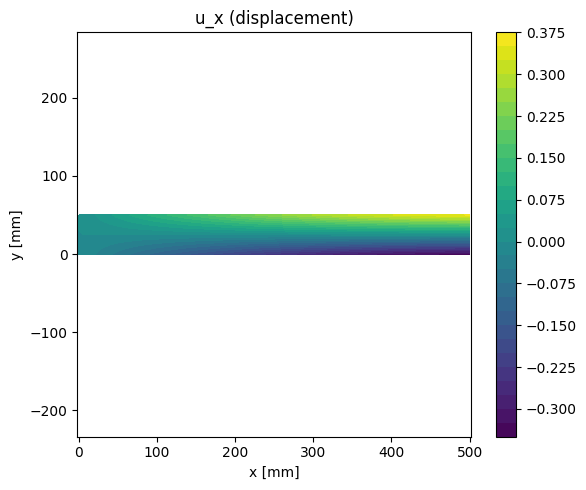

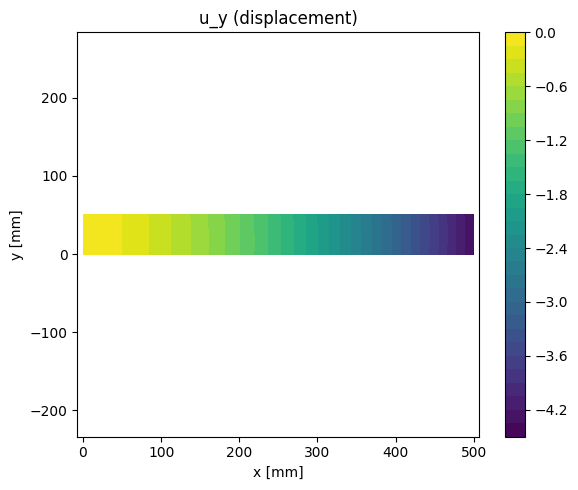

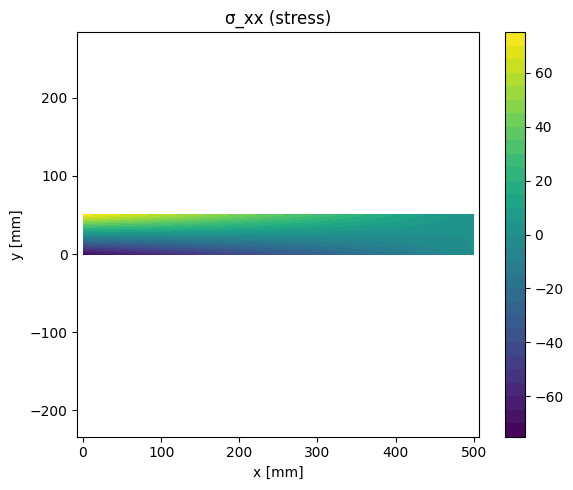

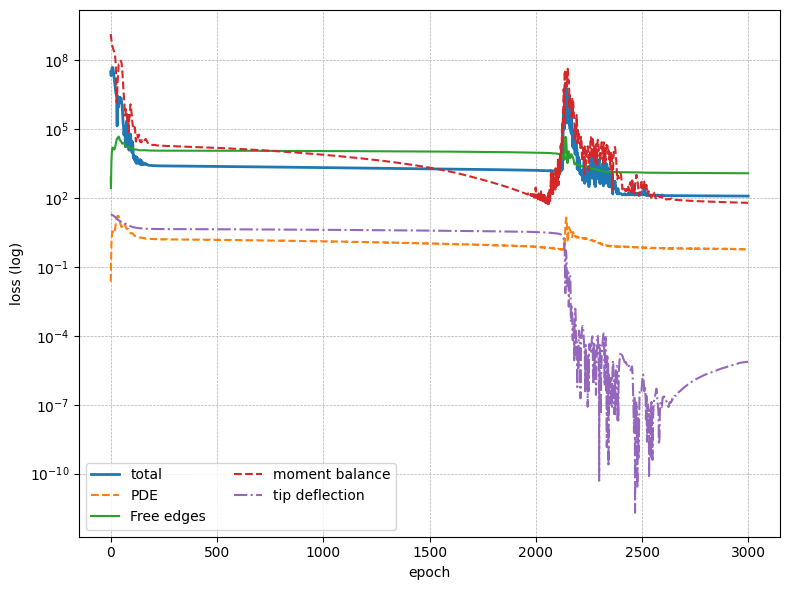

Theoretical σ_xx max ~ -72.012 MPa
σ_xx PINN max (clamped edge / top fiber sample) ~ 71.609 MPa
Displacement ratio  |u_x|/|v| ≈ 8.042e-02 (theoretical value ~ h/L = 1.000e-01)
Right-edge mean deflection v_right ~ -4.3616 mm  (theoretical value  ~ 4.3643 mm)


In [ ]:
# ================================================================
#  Plots (with shifted x- and y-axes: x in [0, L], y in [0, h])
# ================================================================
def plot_field(title, values):
    plt.figure(figsize=(6, 5))

    if tri is not None:
        # Contour plot using shifted triangulation (x in [0, L], y in [0, h])
        plt.tricontourf(tri, values, levels=30)
    else:
        # Fallback: scatter plot using shifted coordinates
        plt.scatter(xy_plot[:, 0], xy_plot[:, 1], c=values)

    plt.title(title)
    plt.colorbar()
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')

    # Force x-axis and y-axis ranges (0→L, 0→h)
    plt.xlim(0.0, L)
    plt.ylim(0.0, h)

    plt.axis('equal')
    plt.tight_layout()

# Flip vertical displacement and stress sign for plotting,
# so that downward deflection appears as negative and σ_xx sign matches beam theory
v = -v
u = -u
sigma_xx = -sigma_xx

plot_field('u_x (displacement)', u)
plot_field('u_y (displacement)', v)
plot_field('σ_xx (stress)', sigma_xx)

plt.figure(figsize=(8, 6))
plt.semilogy(hist_total,   label='total', linewidth=2)
plt.semilogy(hist_pde,     label='PDE', linestyle='--')
#plt.semilogy(hist_bc,      label='BC clamped (diagnostic)', linestyle=':')
#plt.semilogy(hist_res,     label='Resultant', linestyle='-')
plt.semilogy(hist_free,    label='Free edges', linestyle='-')
#plt.semilogy(hist_syy,     label='σyy≈0 (bulk)', linestyle='--')
#plt.semilogy(hist_neutral, label='∫σxx dy≈0', linestyle=':')
#plt.semilogy(hist_mid,     label='σxx(y_mid)', linestyle='-.')
plt.semilogy(hist_moment,  label='moment balance', linestyle='--')
#plt.semilogy(hist_beam,    label='beam prior', linestyle='-.')
#plt.semilogy(hist_uniform, label='right uniform v', linestyle='-.')
plt.semilogy(hist_tip,     label='tip deflection', linestyle='-.')

plt.legend(ncol=2)
plt.xlabel('epoch')
plt.ylabel('loss (log)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

# ================================================================
#  Sanity checks
# ================================================================
sigma_max_theory = F_total * L * (h / 2) / (I + 1e-30)
print(f"Theoretical σ_xx max ~ {sigma_max_theory:.3f} MPa")

enc_left_idx = np.where(np.isclose(xy[:, 0], x_min, atol=1e-9))[0]
top_band_idx = enc_left_idx[xy[enc_left_idx, 1] >= y_max - 0.02 * h]
if len(top_band_idx):
    print(
        f"σ_xx PINN max (clamped edge / top fiber sample) ~ "
        f"{float(sigma_xx[top_band_idx].max()):.3f} MPa"
    )

ux_max = np.max(np.abs(u))
vy_max = np.max(np.abs(v))
print(
    f"Displacement ratio  |u_x|/|v| ≈ {ux_max/(vy_max+1e-30):.3e} "
    f"(theoretical value ~ h/L = {h/(L+1e-30):.3e})"
)

if len(right_xy):
    v_right_np = v[load_mask]
    print(
        f"Right-edge mean deflection v_right ~ {np.mean(v_right_np):.4f} mm  "
        f"(theoretical value  ~ {float(v_tip_target_theory):.4f} mm)"
    )

In [ ]:

# ================================================================
#  FEA import and PINN–FEA error metrics
# ================================================================
import pandas as pd
import numpy as np

# --- 1)
fea_csv_path = "https://raw.githubusercontent.com/am6823/PINN-for-2D-Elasticity-Cantilever-Beam/refs/heads/main/data/1/fea_raw/fea_nodal_fields.csv"


df_fea = pd.read_csv(fea_csv_path, sep=";")


col_node    = "nodes"
col_ux_fea  = "Displacement:X_NoLayer_NoSystem_false_None"
col_uy_fea  = "Displacement:Y_NoLayer_NoSystem_false_None"



df_fea_grouped = (
    df_fea
    .groupby(col_node)[[col_ux_fea, col_uy_fea]]
    .mean()
    .reset_index()
)


fea_sigma_csv_path = "https://raw.githubusercontent.com/am6823/PINN-for-2D-Elasticity-Cantilever-Beam/refs/heads/main/data/1/fea_processed/fea_sigma_xx_nodal_avg.csv"


df_sigma = pd.read_csv(fea_sigma_csv_path)
col_node_sigma = "node_id"
col_sxx_fea    = "sigma_xx"


node_ids_pinn = ids
n_nodes       = len(node_ids_pinn)

id_to_idx = {int(nid): i for i, nid in enumerate(node_ids_pinn)}

ux_fea  = np.full(n_nodes, np.nan)
uy_fea  = np.full(n_nodes, np.nan)
sxx_fea = np.full(n_nodes, np.nan)


for _, row in df_fea_grouped.iterrows():
    nid = int(row[col_node])
    if nid in id_to_idx:
        i = id_to_idx[nid]
        ux_fea[i] = row[col_ux_fea]
        uy_fea[i] = row[col_uy_fea]


for _, row in df_sigma.iterrows():
    nid = int(row[col_node_sigma])
    if nid in id_to_idx:
        i = id_to_idx[nid]
        sxx_fea[i] = row[col_sxx_fea]


mask = ~(np.isnan(ux_fea) | np.isnan(uy_fea) | np.isnan(sxx_fea))

ux_fea_val   = ux_fea[mask]
uy_fea_val   = uy_fea[mask]
sxx_fea_val  = sxx_fea[mask]



ux_pinn_val  = u[mask]
uy_pinn_val  = v[mask]
sxx_pinn_val = sigma_xx[mask]


def rel_L2(pinn, fea):
    return np.sqrt(np.sum((pinn - fea)**2)) / (np.sqrt(np.sum(fea**2)) + 1e-30)

def rel_Linf(pinn, fea):
    return np.max(np.abs(pinn - fea)) / (np.max(np.abs(fea)) + 1e-30)

err_L2_ux   = rel_L2(ux_pinn_val,  ux_fea_val)
err_L2_uy   = rel_L2(uy_pinn_val,  uy_fea_val)
err_L2_sxx  = rel_L2(sxx_pinn_val, sxx_fea_val)

err_Linf_ux  = rel_Linf(ux_pinn_val,  ux_fea_val)
err_Linf_uy  = rel_Linf(uy_pinn_val,  uy_fea_val)
err_Linf_sxx = rel_Linf(sxx_pinn_val, sxx_fea_val)

print("\n================= PINN vs FEA error metrics =================")
print(f"Relative L2 error  on u_x     : {err_L2_ux: .3e}")
print(f"Relative L2 error  on u_y     : {err_L2_uy: .3e}")
print(f"Relative L2 error  on sigma_xx: {err_L2_sxx: .3e}")
print(f"Relative Linf error on u_x    : {err_Linf_ux: .3e}")
print(f"Relative Linf error on u_y    : {err_Linf_uy: .3e}")
print(f"Relative Linf error on sigma_xx: {err_Linf_sxx: .3e}")





================= PINN vs FEA error metrics =================
Relative L2 error  on u_x     :  5.081e-02
Relative L2 error  on u_y     :  4.084e-02
Relative L2 error  on sigma_xx:  6.839e-02
Relative Linf error on u_x    :  6.940e-02
Relative Linf error on u_y    :  3.428e-02
Relative Linf error on sigma_xx:  1.099e-01


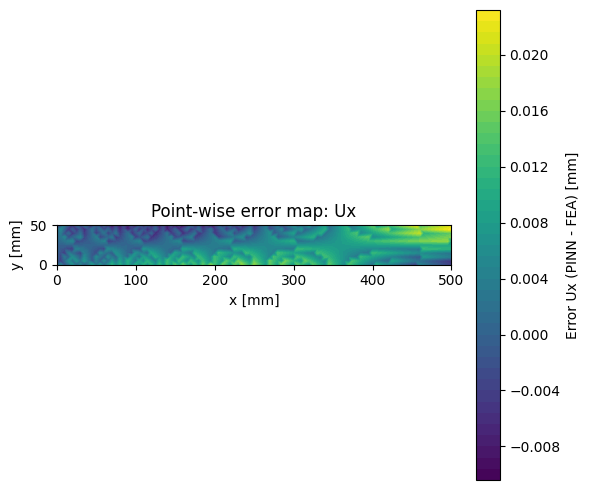

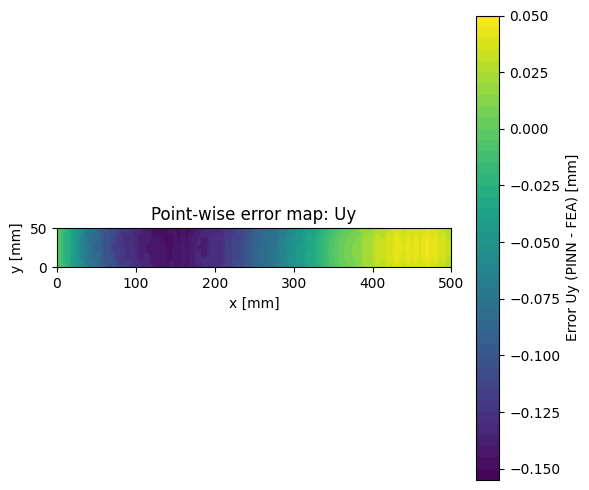

In [ ]:
# ================================================================
#  Point-wise error maps for Ux and Uy (PINN - FEA)
# ================================================================

from matplotlib.tri import Triangulation

# ================================================================
#  Point-wise error maps for Ux and Uy (PINN - FEA)
# ================================================================


xy_plot_valid = xy_plot[mask, :]    # shape (M, 2)
xv = xy_plot_valid[:, 0]
yv = xy_plot_valid[:, 1]


tri_valid = Triangulation(xv, yv)


ux_err_local = ux_pinn_val - ux_fea_val
uy_err_local = uy_pinn_val - uy_fea_val

# ------------------- Ux -------------------
plt.figure(figsize=(6, 5))
plt.tricontourf(tri_valid, ux_err_local, levels=40)
plt.colorbar(label="Error Ux (PINN - FEA) [mm]")
plt.title("Point-wise error map: Ux")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.xlim(0.0, L)
plt.ylim(0.0, h)
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()

# ------------------- Uy -------------------
plt.figure(figsize=(6, 5))
plt.tricontourf(tri_valid, uy_err_local, levels=40)
plt.colorbar(label="Error Uy (PINN - FEA) [mm]")
plt.title("Point-wise error map: Uy")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.xlim(0.0, L)
plt.ylim(0.0, h)
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()




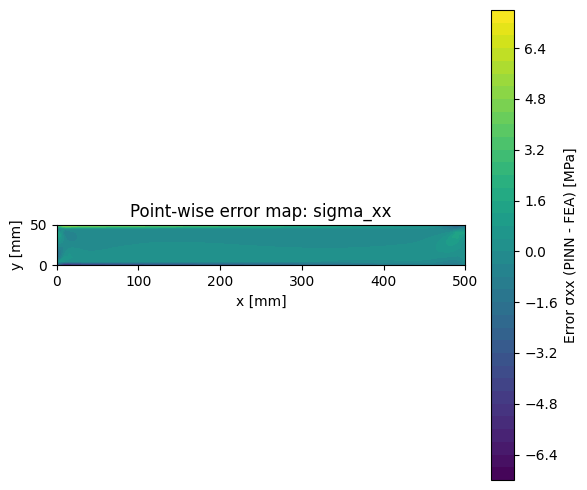

In [ ]:
# ================================================================
#  Point-wise error maps for sigma_xx (PINN - FEA)
# ================================================================


sxx_err_local = sxx_pinn_val - sxx_fea_val

plt.figure(figsize=(6, 5))
plt.tricontourf(tri_valid, sxx_err_local, levels=40)
plt.colorbar(label="Error σxx (PINN - FEA) [MPa]")
plt.title("Point-wise error map: sigma_xx")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.xlim(0.0, L)
plt.ylim(0.0, h)
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()


In [ ]:
# ================================================================
#  Data Hybrid
# ================================================================


err_L2_ux_baseline   = err_L2_ux
err_L2_uy_baseline   = err_L2_uy
err_L2_sxx_baseline  = err_L2_sxx
err_Linf_ux_baseline = err_Linf_ux
err_Linf_uy_baseline = err_Linf_uy
err_Linf_sxx_baseline = err_Linf_sxx



mask_torch = torch.from_numpy(mask).to(device)


xyn_data_t = xyn_t[mask_torch]   # shape (N_data, 2)


ux_data = -ux_fea_val
uy_data = -uy_fea_val
sxx_data = -sxx_fea_val

ux_data_t  = torch.tensor(ux_data,  dtype=torch.float64, device=device)
uy_data_t  = torch.tensor(uy_data,  dtype=torch.float64, device=device)
sxx_data_t = torch.tensor(sxx_data, dtype=torch.float64, device=device)



Sauvegarde des erreurs physics-only (baseline).
On prépare les données FEA pour le fine-tuning data-assisted...


In [ ]:
# ================================================================
#  STAGE 2 : Fine-tuning data-assisted with FEA data
# ================================================================

USE_DATA_FINE_TUNING = True

if USE_DATA_FINE_TUNING:
    model.load_state_dict(best_state)
    model.train()

    EPOCHS_DATA = 800
    lr_data     = 5e-4
    opt_data    = torch.optim.Adam(model.parameters(),
                                   lr=lr_data, weight_decay=1e-6)


    W_DATA = 10.0

    print(f"\n=== Start of the data-assisted fine-tuning on {EPOCHS_DATA} epochs ===")

    for epoch in range(EPOCHS_DATA):
        # 1) Physique : PDE + encastrement + flèche au bout (plus léger que le stage 1)
        xn_int = sample_interior(4000)  # quelques points intérieurs aléatoires
        r1, r2, _, _ = pde_residual(xn_int)
        loss_pde = mse(r1, torch.zeros_like(r1)) + mse(r2, torch.zeros_like(r2))

        uv_fix  = model(fixed_t)
        loss_bc = mse(uv_fix, zero_uv)

        uv_right = model(right_t)
        v_right  = uv_right[:, 1]
        loss_tip = mse(v_right.mean(), v_tip_target)

        # 2)
        x_phys_data = xn_to_phys(xyn_data_t).detach().requires_grad_(True)
        xn_back_data = phys_to_xn(x_phys_data)

        uv_data = model(xn_back_data)
        u_pred_data = uv_data[:, 0]
        v_pred_data = uv_data[:, 1]


        sxx_pred_data, _, _, _, _ = compute_stress_autograd(uv_data, x_phys_data)


        loss_data_disp = mse(u_pred_data, ux_data_t) + mse(v_pred_data, uy_data_t)

        loss_data_sigma = mse(sxx_pred_data, sxx_data_t)


        loss_data = loss_data_disp + loss_data_sigma


        loss_total = (
            W_PDE * loss_pde +
            W_BC  * loss_bc +
            W_TIP * loss_tip +
            W_DATA * loss_data
        )

        opt_data.zero_grad()
        loss_total.backward()
        opt_data.step()

        if (epoch + 1) % 100 == 0:
            print(
                f"[Data epoch {epoch+1:4d}] "
                f"loss_total={loss_total.item():.3e} | "
                f"pde={loss_pde.item():.3e} | "
                f"bc={loss_bc.item():.3e} | "
                f"tip={loss_tip.item():.3e} | "
                f"data_disp={loss_data_disp.item():.3e} | "
                f"data_sigma={loss_data_sigma.item():.3e}"
            )

    print("=== End of fine-tuning data-assisted ===")


    model.eval()
    uv_t, sxx_t, syy_t, sxy_t = predict_uv_sigma(xyn_t)


    u_new        = -uv_t[:, 0].detach().cpu().numpy()
    v_new        = -uv_t[:, 1].detach().cpu().numpy()
    sigma_xx_new = -sxx_t.detach().cpu().numpy()

    ux_pinn_val_new  = u_new[mask]
    uy_pinn_val_new  = v_new[mask]
    sxx_pinn_val_new = sigma_xx_new[mask]


    err_L2_ux_new   = rel_L2(ux_pinn_val_new,  ux_fea_val)
    err_L2_uy_new   = rel_L2(uy_pinn_val_new,  uy_fea_val)
    err_L2_sxx_new  = rel_L2(sxx_pinn_val_new, sxx_fea_val)

    err_Linf_ux_new  = rel_Linf(ux_pinn_val_new,  ux_fea_val)
    err_Linf_uy_new  = rel_Linf(uy_pinn_val_new,  uy_fea_val)
    err_Linf_sxx_new = rel_Linf(sxx_pinn_val_new, sxx_fea_val)

    print("\n===== After data-assisted fine-tuning (vs FEA) =====")
    print(f"Relative L2 error  on u_x     : {err_L2_ux_new: .3e} "
          f"(baseline: {err_L2_ux_baseline: .3e})")
    print(f"Relative L2 error  on u_y     : {err_L2_uy_new: .3e} "
          f"(baseline: {err_L2_uy_baseline: .3e})")
    print(f"Relative L2 error  on sigma_xx: {err_L2_sxx_new: .3e} "
          f"(baseline: {err_L2_sxx_baseline: .3e})")

    print(f"Relative Linf error on u_x    : {err_Linf_ux_new: .3e} "
          f"(baseline: {err_Linf_ux_baseline: .3e})")
    print(f"Relative Linf error on u_y    : {err_Linf_uy_new: .3e} "
          f"(baseline: {err_Linf_uy_baseline: .3e})")
    print(f"Relative Linf error on sigma_xx: {err_Linf_sxx_new: .3e} "
          f"(baseline: {err_Linf_sxx_baseline: .3e})")



=== Début du fine-tuning data-assisted sur 800 epochs ===
[Data epoch  100] loss_total=1.824e+01 | pde=5.156e-01 | bc=0.000e+00 | tip=2.948e-07 | data_disp=8.970e-03 | data_sigma=1.813e+00
[Data epoch  200] loss_total=1.813e+01 | pde=5.229e-01 | bc=0.000e+00 | tip=6.183e-07 | data_disp=8.902e-03 | data_sigma=1.803e+00
[Data epoch  300] loss_total=1.806e+01 | pde=5.196e-01 | bc=0.000e+00 | tip=5.397e-07 | data_disp=8.853e-03 | data_sigma=1.795e+00
[Data epoch  400] loss_total=1.799e+01 | pde=5.104e-01 | bc=0.000e+00 | tip=4.909e-07 | data_disp=8.788e-03 | data_sigma=1.789e+00
[Data epoch  500] loss_total=1.792e+01 | pde=5.153e-01 | bc=0.000e+00 | tip=4.575e-07 | data_disp=8.711e-03 | data_sigma=1.782e+00
[Data epoch  600] loss_total=1.785e+01 | pde=4.950e-01 | bc=0.000e+00 | tip=4.299e-07 | data_disp=8.622e-03 | data_sigma=1.775e+00
[Data epoch  700] loss_total=1.777e+01 | pde=4.999e-01 | bc=0.000e+00 | tip=4.044e-07 | data_disp=8.522e-03 | data_sigma=1.767e+00
[Data epoch  800] loss_t